In [71]:
from code import histograms as h
from code import architectures, load_data
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline  

In [72]:
train = load_data.load_data('train')
cleaned= load_data.load_data('train_cleaned')
avg = load_data.load_data('train_avg')


# Lets look at one example image

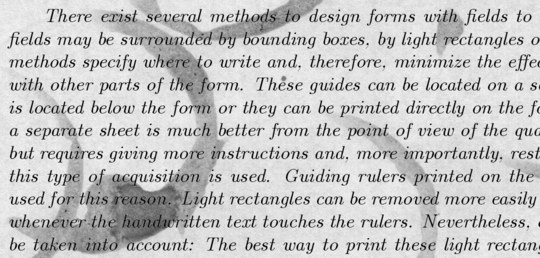

In [67]:
Image(filename='train/2.png')

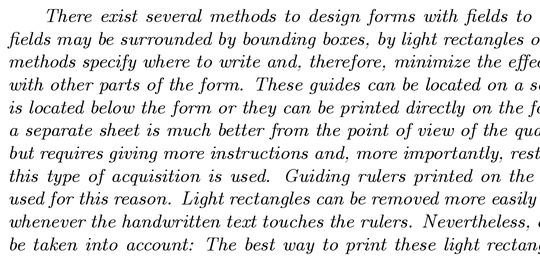

In [21]:
Image(filename='train_cleaned/2.png')

# What does the distribution of pixel values look like for the two sets?

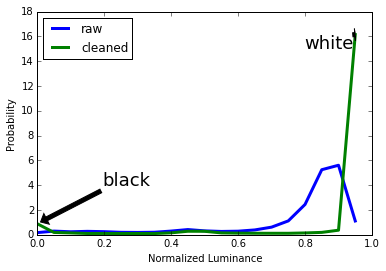

In [22]:
h.plot_train_hist(train, cleaned)

# what does the noise (cleaned - training) distribution look like?

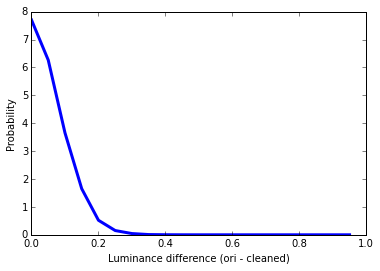

In [24]:
h.train_clean_diff(train, cleaned)

# Lets try the absolute simplest model. 

### A threshold that preserves mean luminance

In [28]:
h.obtain_freq(train, .8)

When the pixel threshold is 0.8, 0.28/0.72 of the data is below/above threshold


0.28353750705718994

In [29]:
h.data_threshold(train, .28)

Multiplying freq_0 by 100
To obtain 28.00 fraction of the data as "0" we need a threshold equal to 0.80


0.80000001192092896

In [30]:
hist_pred = h.predict(train, .8)

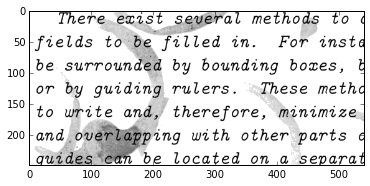

In [38]:
imshow(hist_pred[16,0,:,:], cmap = cm.Greys_r)

# Last results are not very impressive.

# Lets predict char distance from image to see if we can use that information in a clever way

max achieved at freq: 0.028225806451612902
Distance between symbols is 35.0 pixels


35.0

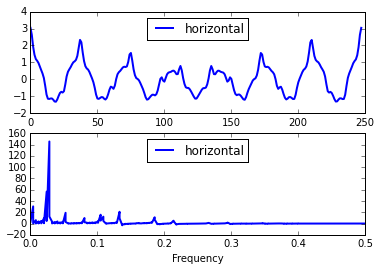

In [54]:
h.get_char_distance(train[16,0,:,:], plot_flag=True, verbose=1, dir='v')

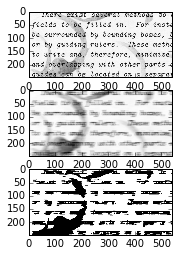

In [64]:
filtered, thresholded = h.filter_image(train[16,0,:,:], (8/2,35/2), .3, plot_flag=True)

# Not very impressive either
## and for some images, computation failed. Code would need to be more robust

# A simplified version. Use as input average line luminance

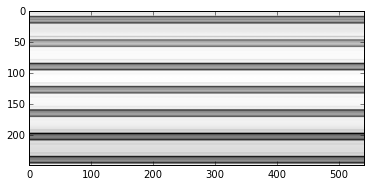

In [66]:
avg = h.avg_lines(train[16,0,:,:])
plt.imshow(avg, cmap=cm.Greys_r)

# Lets try a CNN, not a typical one but one that resembles parallel processing at multiple scales in the retina

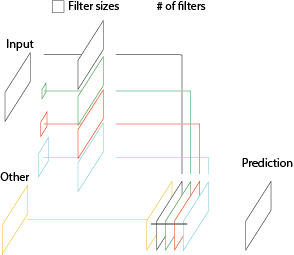

In [68]:
Image(filename='Images/Models-01.png')

In [39]:
m1 = architectures.generate_model_from_loss_file('model_weights/m1_loss.hdf5')

0
100
50


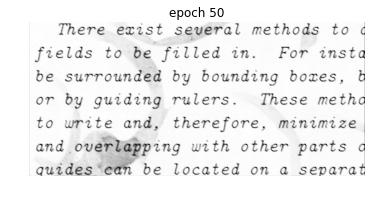

In [43]:
m1.save_one_image(train[16:17,:,:,:], 'm1_epoch{0}.png', epoch_list=[0,50,100])

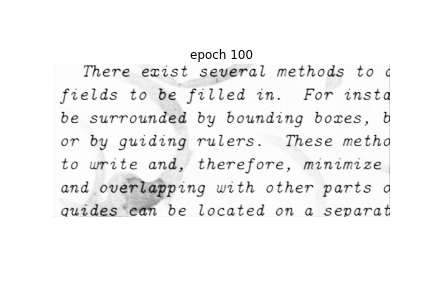

In [45]:
Image(filename='Images/m1_epoch100.png')

# Lets try a different, deeper architecture

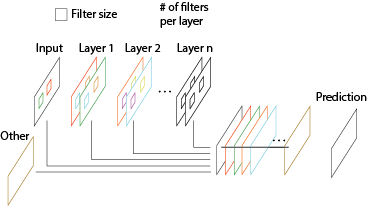

In [51]:
Image(filename='Images/Models-02.png')

In [46]:
m12 = architectures.generate_model_from_loss_file('model_weights/m12_loss.hdf5')

0
100
300


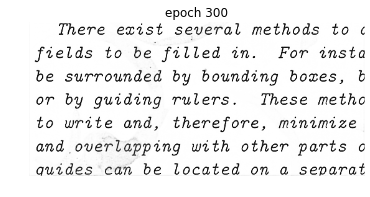

In [53]:
m12.save_one_image(train[16:17,:,:,:], 'm12_epoch{0}', epoch_list=[0,100,300], X2=avg[16:17,:,:,:])

# More examples

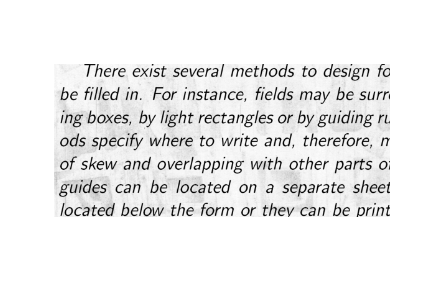

In [90]:
Image(filename='Images/ori_2.png')

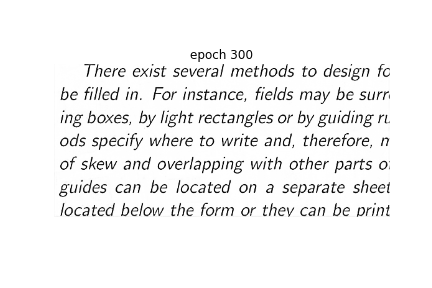

In [92]:
Image(filename='Images/m12_im2_epoch300.png')

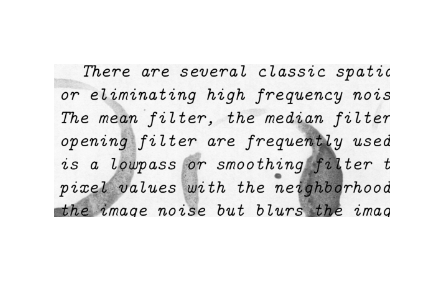

In [91]:
Image(filename='Images/ori_17.png')

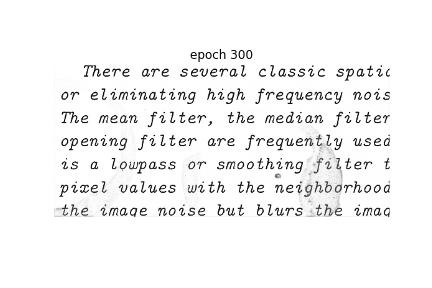

In [93]:
Image(filename='Images/m12_im17_epoch300.png')